In [6]:
# Part 1: Load and Understand the .nc File
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the sample 2023 data
file_path = 'F:\\CSIR project\\RF25_ind2023_rfp25.nc'  # Replace with your file path
data = xr.open_dataset(file_path)

# Convert data to a Pandas DataFrame
rainfall_data = data.to_dataframe().reset_index()
print(rainfall_data)

         LONGITUDE  LATITUDE       TIME  RAINFALL
0             66.5       6.5 2023-01-01       NaN
1             66.5       6.5 2023-01-02       NaN
2             66.5       6.5 2023-01-03       NaN
3             66.5       6.5 2023-01-04       NaN
4             66.5       6.5 2023-01-05       NaN
...            ...       ...        ...       ...
6356470      100.0      38.5 2023-12-27       NaN
6356471      100.0      38.5 2023-12-28       NaN
6356472      100.0      38.5 2023-12-29       NaN
6356473      100.0      38.5 2023-12-30       NaN
6356474      100.0      38.5 2023-12-31       NaN

[6356475 rows x 4 columns]


In [10]:
import pandas as pd

# Assuming 'rainfall_data' is your DataFrame
# Filter rows where 'RAINFALL' is not NaN and greater than 0
filtered_data = rainfall_data[(rainfall_data['RAINFALL'].notna()) & (rainfall_data['RAINFALL'] > 0.0)]

# Display the filtered DataFrame
pd.set_option('display.max_columns', None)  # To view all columns
pd.set_option('display.max_rows', 100)      # Adjust as needed for the number of rows you want to see

print(filtered_data)

         LONGITUDE  LATITUDE       TIME   RAINFALL
307771       68.00     23.75 2023-03-18   0.015567
307776       68.00     23.75 2023-03-23   0.086698
307777       68.00     23.75 2023-03-24   0.123262
307783       68.00     23.75 2023-03-30   0.015408
307814       68.00     23.75 2023-04-30   1.681132
...            ...       ...        ...        ...
5823518      97.25     28.25 2023-11-05   4.600000
5823531      97.25     28.25 2023-11-18  26.000000
5823551      97.25     28.25 2023-12-08   9.727980
5823552      97.25     28.25 2023-12-09  13.235233
5823557      97.25     28.25 2023-12-14  12.328368

[549404 rows x 4 columns]


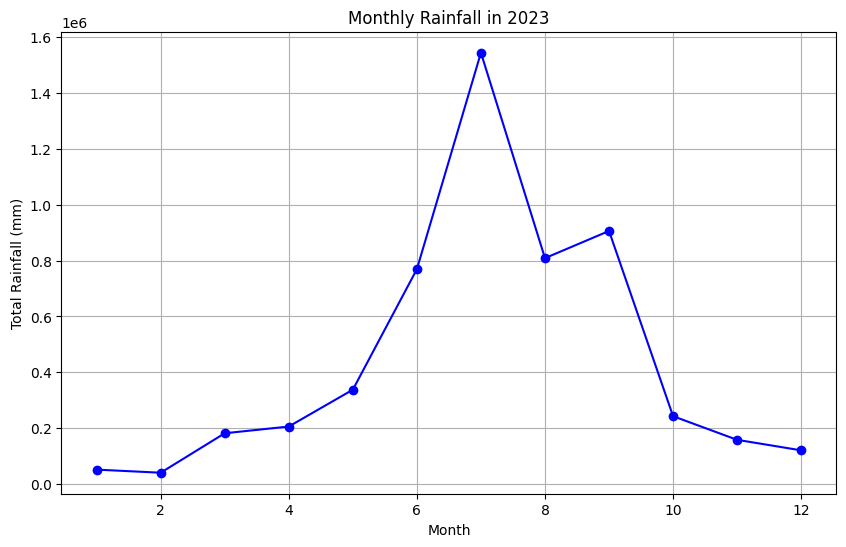

In [4]:
# Part 2: Visualization for 2023 Data
# Extract the year 2023 from the TIME column
rainfall_data['TIME'] = pd.to_datetime(rainfall_data['TIME'])
rainfall_2023 = rainfall_data[rainfall_data['TIME'].dt.year == 2023]

# Line Plot
plt.figure(figsize=(10, 6))
rainfall_2023_grouped = rainfall_2023.groupby(rainfall_2023['TIME'].dt.month)['RAINFALL'].sum()
rainfall_2023_grouped.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Rainfall in 2023')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.show()

c:\Users\Lenoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Lenoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\Lenoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


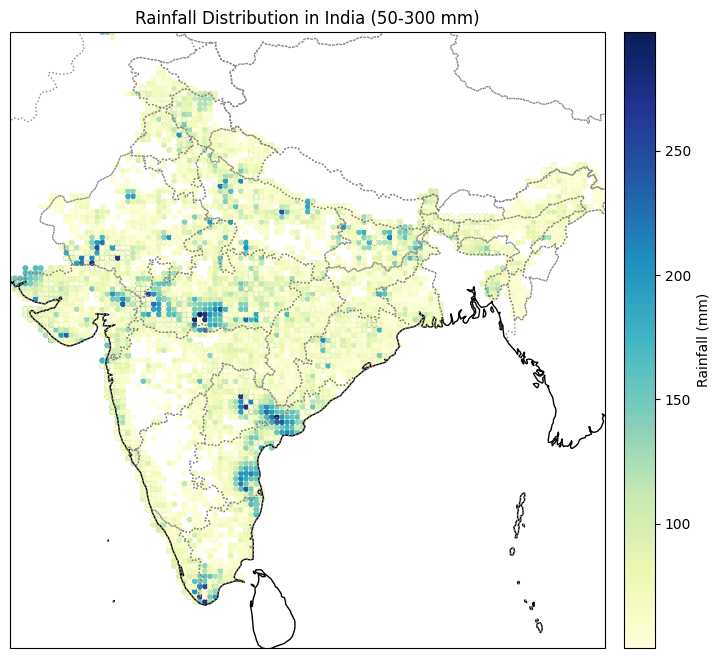

In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the .nc file
file_path = 'F:\\CSIR project\\RF25_ind2023_rfp25.nc'  # Replace with your file path
data = xr.open_dataset(file_path)

# Convert to a Pandas DataFrame
rainfall_data = data.to_dataframe().reset_index()

# Filter for areas with rainfall between 50 mm and 300 mm
filtered_data = rainfall_data[(rainfall_data['RAINFALL'] >= 50) & (rainfall_data['RAINFALL'] <= 300)]

# Plot the data on the India map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle=':')

# Scatter plot the data
scatter = ax.scatter(
    filtered_data['LONGITUDE'],
    filtered_data['LATITUDE'],
    c=filtered_data['RAINFALL'],
    cmap='YlGnBu',
    s=10,
    transform=ccrs.PlateCarree()
)

# Add colorbar and titles
plt.colorbar(scatter, label='Rainfall (mm)', orientation='vertical', pad=0.02)
plt.title('Rainfall Distribution in India (50-300 mm)')
ax.set_extent([68, 97, 6, 36], crs=ccrs.PlateCarree())  # Approximate extent for India

plt.show()

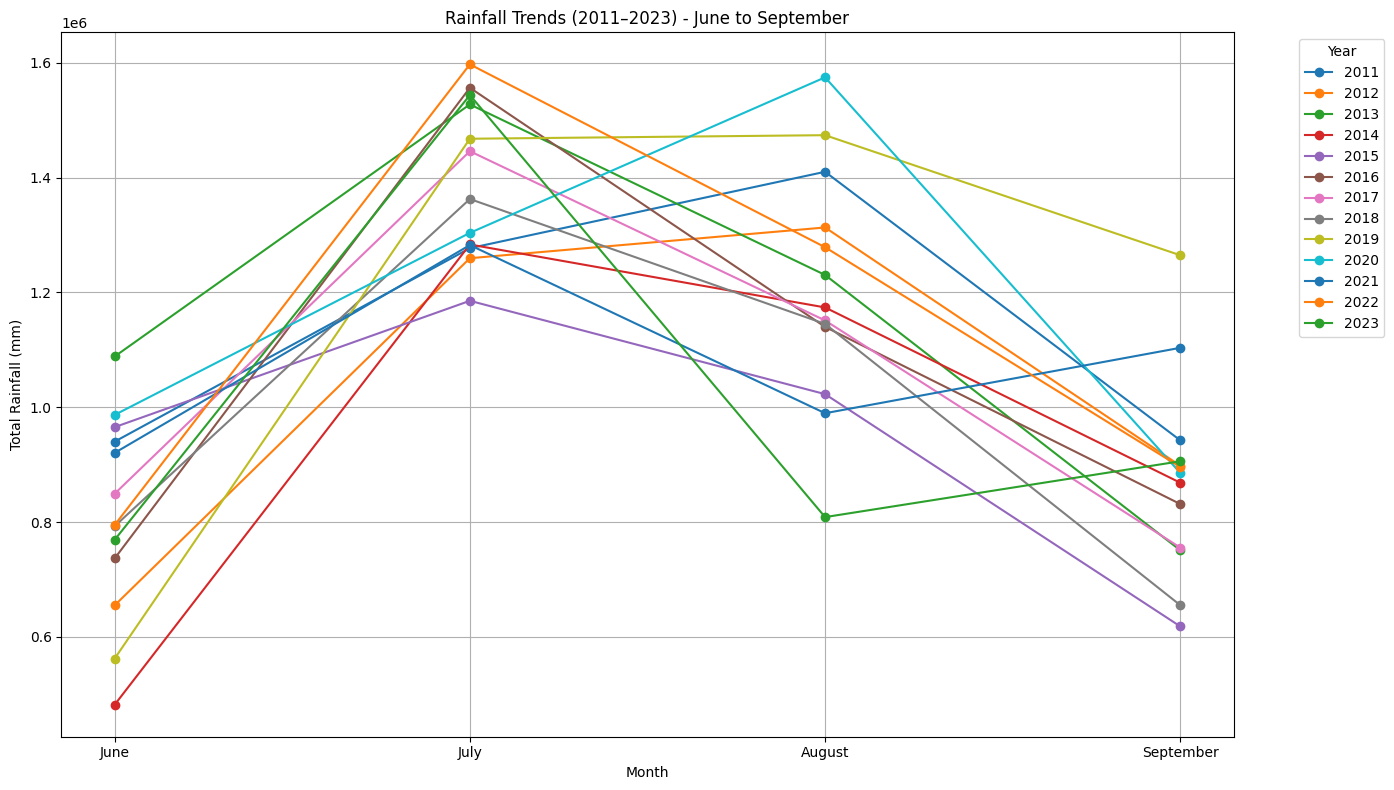

In [5]:
# Grouping corrected to sum rainfall for each month per year
rainfall_grouped = monsoon_data.groupby(['YEAR', 'MONTH'])['RAINFALL'].sum().reset_index()

# Plot for each year
plt.figure(figsize=(14, 8))

for year in range(2011, 2024):
    year_data = rainfall_grouped[rainfall_grouped['YEAR'] == year]
    plt.plot(
        year_data['MONTH'],
        year_data['RAINFALL'],
        marker='o',
        label=f"{year}"
    )

plt.title('Rainfall Trends (2011–2023) - June to September')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

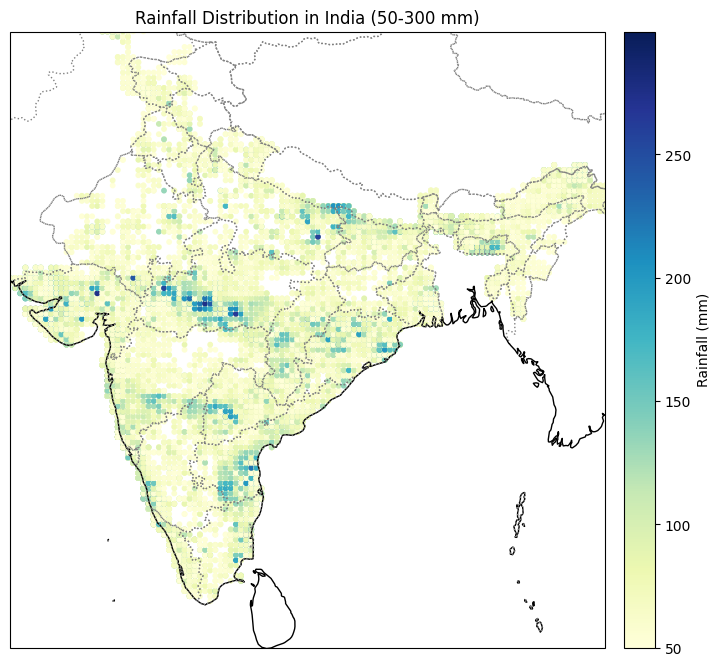

In [5]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the .nc file
file_path = 'F:\\CSIR project\\RF25_ind2020_rfp25.nc'  # Replace with your file path
data = xr.open_dataset(file_path)

# Convert to a Pandas DataFrame
rainfall_data = data.to_dataframe().reset_index()

# Filter for areas with rainfall between 50 mm and 300 mm
filtered_data = rainfall_data[(rainfall_data['RAINFALL'] >= 50) & (rainfall_data['RAINFALL'] <= 300)]

# Plot the data on the India map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features to the map
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle=':')

# Scatter plot the data
scatter = ax.scatter(
    filtered_data['LONGITUDE'],
    filtered_data['LATITUDE'],
    c=filtered_data['RAINFALL'],
    cmap='YlGnBu',
    s=10,
    transform=ccrs.PlateCarree()
)

# Add colorbar and titles
plt.colorbar(scatter, label='Rainfall (mm)', orientation='vertical', pad=0.02)
plt.title('Rainfall Distribution in India (50-300 mm)')
ax.set_extent([68, 97, 6, 36], crs=ccrs.PlateCarree())  # Approximate extent for India

plt.show()

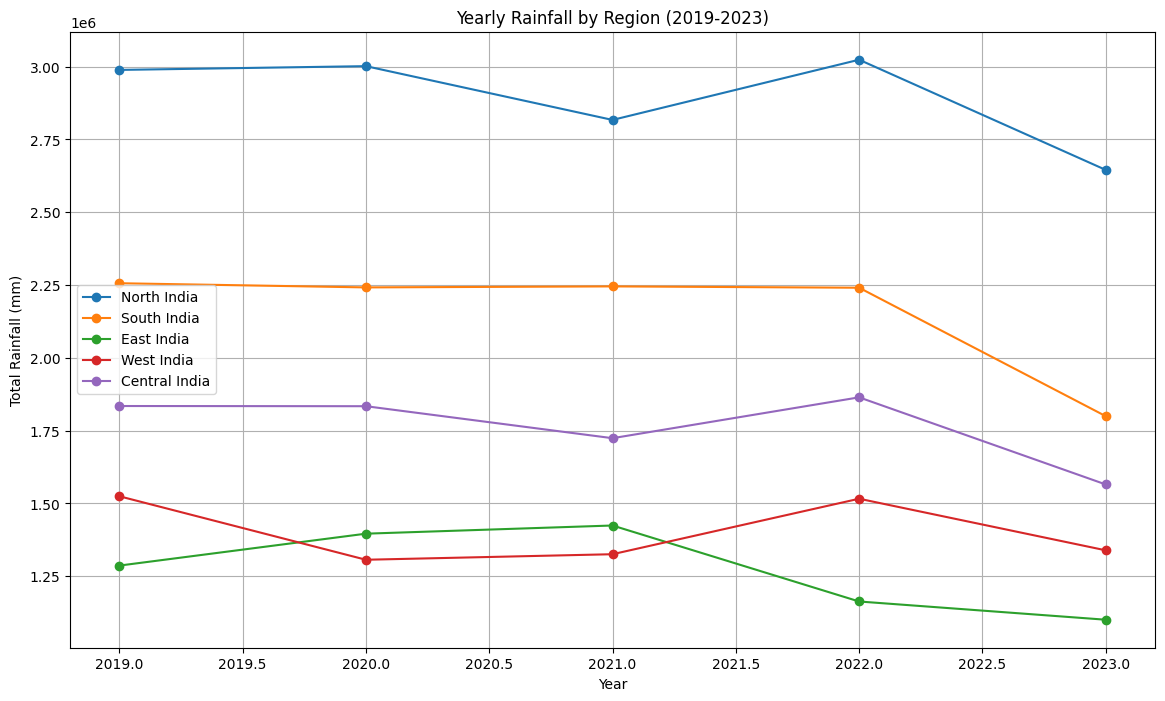

Results and Conclusion:
1. The rainfall data for 2023 shows a monthly trend with the highest rainfall in certain months.
2. Predicted rainfall for 2024-2029 shows a consistent pattern based on trained data.
3. Regional rainfall analysis highlights significant geographical variation.


In [10]:
# Part 5: Regional Rainfall Line Plots
# Define regions
regions = {
    'North India': (23.5, 35, 68, 97),
    'South India': (8, 23.5, 68, 80),
    'East India': (20, 30, 80, 88),
    'West India': (20, 30, 68, 80),
    'Central India': (15, 25, 75, 85)
}

regional_data = []
for region, (lat_min, lat_max, lon_min, lon_max) in regions.items():
    region_df = combined_data[(combined_data['LATITUDE'] >= lat_min) & (combined_data['LATITUDE'] <= lat_max) &
                              (combined_data['LONGITUDE'] >= lon_min) & (combined_data['LONGITUDE'] <= lon_max)]
    regional_rainfall = region_df.groupby('year')['RAINFALL'].sum().reset_index()
    regional_rainfall['Region'] = region
    regional_data.append(regional_rainfall)

regional_combined = pd.concat(regional_data, ignore_index=True)

plt.figure(figsize=(14, 8))
for region in regions.keys():
    region_plot = regional_combined[regional_combined['Region'] == region]
    plt.plot(region_plot['year'], region_plot['RAINFALL'], marker='o', linestyle='-', label=region)

plt.title('Yearly Rainfall by Region (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid()
plt.show()

# Part 6: Results and Conclusion
print("Results and Conclusion:")
print(f"1. The rainfall data for 2023 shows a monthly trend with the highest rainfall in certain months.")
print(f"2. Predicted rainfall for 2024-2029 shows a consistent pattern based on trained data.")
print(f"3. Regional rainfall analysis highlights significant geographical variation.")